<h1 style="font-size: 50px; text-align: center; color:Yellow; background-color:red; padding:25px; border:2px solid black">IPL Analysis</h1>

<p><b>All data is taken from <a href="https://codebasics.io/challenges/codebasics-resume-project-challenge/13">Code Basics</a> </b></p>

<hr>
<h1>Data Exploration</h1>
<hr>

**Datasets:**
- dim_players.csv
- dim_match_summary.csv
- fact_bating_summary.csv
- fact_bowling_summary.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_players = pd.read_csv("./datasets/dim_players.csv")
df_players

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter
...,...,...,...,...,...
287,AbishekPorel,Capitals,Left hand Bat,Not Available,Wicketkeeper Batter
288,SisandaMagala,Super Kings,Right hand Bat,Right arm Fast medium,Bowler
289,MohitRathee,Punjab Kings,Right hand Bat,Legbreak,Allrounder
290,RajvardhanHangargekar,Super Kings,Right hand Bat,Right arm Fast medium,Bowling Allrounder


In [3]:
df_players.team.unique()

array(['Super Kings', 'KKR', 'Capitals', 'RCB', 'Mumbai', 'Sunrisers',
       'Royals', 'Punjab Kings', 'Titans', 'Super Giants'], dtype=object)

In [4]:
# Player count by teams
df_players.team.value_counts()

team
Mumbai          39
Punjab Kings    38
Sunrisers       35
KKR             35
Royals          33
RCB             30
Capitals        29
Super Kings     28
Titans          13
Super Giants    12
Name: count, dtype: int64

In [5]:
# player count by role
df_players.playingRole.value_counts()

playingRole
Bowler                 117
Allrounder              41
Wicketkeeper Batter     29
Top order Batter        27
Bowling Allrounder      23
Batting Allrounder      19
Middle order Batter     13
Batter                  12
Opening Batter          11
Name: count, dtype: int64

In [6]:
df_players.isnull().sum()

name            0
team            0
battingStyle    0
bowlingStyle    0
playingRole     0
dtype: int64

Reading remaining datasets

In [7]:
df_match_summary =  pd.read_csv("./datasets/dim_match_summary.csv")
df_fact_bating =  pd.read_csv("./datasets/fact_bating_summary.csv")
df_fact_bowling =  pd.read_csv("./datasets/fact_bowling_summary.csv")

In [8]:
df_match_summary.head(3)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597


In [9]:
df_match_summary.shape

(206, 6)

In [10]:
type(df_match_summary.matchDate[0])

str

In [11]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [12]:
df_match_summary.isna().sum()

team1        0
team2        0
winner       0
margin       0
matchDate    0
match_id     0
dtype: int64

In [13]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [14]:
df_fact_bating.shape

(3268, 11)

In [15]:
df_fact_bating.isna().sum()

match_id       0
match          0
teamInnings    0
battingPos     0
batsmanName    0
out/not_out    0
runs           0
balls          0
4s             0
6s             0
SR             0
dtype: int64

In [16]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [17]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [18]:
df_fact_bowling.shape

(2436, 14)

In [19]:
df_fact_bowling.overs.unique()

array([3. , 4. , 1. , 3.5, 1.4, 3.4, 2. , 3.1, 2.2, 2.1, 2.3, 2.4, 0.1,
       3.3, 1.1, 2.5, 3.2, 1.5, 1.3, 0.3, 0.2, 1.2, 0.5])

In [20]:
df_fact_bowling.isna().sum()

match_id       0
match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
dtype: int64

<hr>
<h1>Data Cleaning</h1>
<hr>

In [21]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [22]:
df_match_summary.matchDate.replace("May 28-29, 2023","May 28, 2023", inplace=True)

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\2402216387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_match_summary.matchDate.replace("May 28-29, 2023","May 28, 2023", inplace=True)


In [23]:
df_match_summary.matchDate.unique()

array(['Oct 15, 2021', 'Oct 13, 2021', 'Oct 11, 2021', 'Oct 10, 2021',
       'Oct 8, 2021', 'Oct 7, 2021', 'Oct 6, 2021', 'Oct 5, 2021',
       'Oct 4, 2021', 'Oct 3, 2021', 'Oct 2, 2021', 'Oct 1, 2021',
       'Sep 30, 2021', 'Sep 29, 2021', 'Sep 28, 2021', 'Sep 27, 2021',
       'Sep 26, 2021', 'Sep 25, 2021', 'Sep 24, 2021', 'Sep 23, 2021',
       'Sep 22, 2021', 'Sep 21, 2021', 'Sep 20, 2021', 'Sep 19, 2021',
       'May 2, 2021', 'May 1, 2021', 'Apr 30, 2021', 'Apr 29, 2021',
       'Apr 28, 2021', 'Apr 27, 2021', 'Apr 26, 2021', 'Apr 25, 2021',
       'Apr 24, 2021', 'Apr 23, 2021', 'Apr 22, 2021', 'Apr 21, 2021',
       'Apr 20, 2021', 'Apr 19, 2021', 'Apr 18, 2021', 'Apr 17, 2021',
       'Apr 16, 2021', 'Apr 15, 2021', 'Apr 14, 2021', 'Apr 13, 2021',
       'Apr 12, 2021', 'Apr 11, 2021', 'Apr 10, 2021', 'Apr 9, 2021',
       'May 29, 2022', 'May 27, 2022', 'May 25, 2022', 'May 24, 2022',
       'May 22, 2022', 'May 21, 2022', 'May 20, 2022', 'May 19, 2022',
       'May 18, 2

In [24]:
type(df_match_summary.matchDate[0])

str

In [25]:
df_match_summary.matchDate = pd.to_datetime(df_match_summary.matchDate, format="%b %d, %Y" )

In [26]:
type(df_match_summary.matchDate[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


In [28]:
enumerate(sorted(df_match_summary.matchDate.dt.year.unique()))

In [29]:
df_year_season = {}
for i, value in enumerate(sorted(df_match_summary.matchDate.dt.year.unique())):
    df_year_season[value] = f"Season {i+1}"

print(df_year_season)

{np.int32(2021): 'Season 1', np.int32(2022): 'Season 2', np.int32(2023): 'Season 3'}


In [30]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942


In [31]:
df_match_summary["season"] = df_match_summary.matchDate.dt.year.map(df_year_season)
df_match_summary

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1
...,...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,2023-04-02,T202485,Season 3
202,Royals,Sunrisers,Royals,72 runs,2023-04-02,T209117,Season 3
203,Super Giants,Capitals,Super Giants,50 runs,2023-04-01,T208512,Season 3
204,Punjab Kings,KKR,Punjab Kings,7 runs,2023-04-01,T202853,Season 3


In [32]:
df_fact_bating

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60
...,...,...,...,...,...,...,...,...,...,...,...
3263,T201566,Super Kings Vs Titans,Titans,3,SaiSudharsan,out,22,17,3,0,129.41
3264,T201566,Super Kings Vs Titans,Titans,4,HardikPandya,out,8,11,0,0,72.72
3265,T201566,Super Kings Vs Titans,Titans,5,VijayShankar,out,27,21,2,1,128.57
3266,T201566,Super Kings Vs Titans,Titans,6,RahulTewatia,not_out,15,14,1,1,107.14


<hr>
<h1>Data Transformation</h1>
<hr>

In [33]:
df_fact_bating["out/not_out"].value_counts()

out/not_out
out        2527
not_out     741
Name: count, dtype: int64

In [34]:
def out_counts(value):
    if isinstance(value,str) and value == "out":
        return 1
    else:
        return 0

In [35]:
df_fact_bating["outs"] = df_fact_bating["out/not_out"].apply(out_counts)
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [36]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [37]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [38]:
df_bating_season_merged = pd.merge( df_match_summary,df_fact_bating, on="match_id")
df_bating_season_merged.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [39]:
df_bating_season_merged[df_bating_season_merged.batsmanName == "RuturajGaikwad"]

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
55,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1,Capitals Vs Super Kings,Super Kings,1,RuturajGaikwad,out,70,50,5,2,140.00,1
112,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,Season 1,Super Kings Vs Punjab Kings,Super Kings,1,RuturajGaikwad,out,12,14,1,0,85.71,1
157,Super Kings,Capitals,Capitals,3 wickets,2021-10-04,T207682,Season 1,Super Kings Vs Capitals,Super Kings,1,RuturajGaikwad,out,13,13,2,0,100.00,1
206,Super Kings,Royals,Royals,7 wickets,2021-10-02,T205672,Season 1,Super Kings Vs Royals,Super Kings,1,RuturajGaikwad,not_out,101,60,9,5,168.33,0
259,Sunrisers,Super Kings,Super Kings,6 wickets,2021-09-30,T203061,Season 1,Sunrisers Vs Super Kings,Super Kings,1,RuturajGaikwad,out,45,38,4,2,118.42,1
352,KKR,Super Kings,Super Kings,2 wickets,2021-09-26,T202406,Season 1,KKR Vs Super Kings,Super Kings,1,RuturajGaikwad,out,40,28,2,3,142.85,1
403,RCB,Super Kings,Super Kings,6 wickets,2021-09-24,T207776,Season 1,RCB Vs Super Kings,Super Kings,1,RuturajGaikwad,out,38,26,4,1,146.15,1
467,Super Kings,Mumbai,Super Kings,20 runs,2021-09-19,T201256,Season 1,Super Kings Vs Mumbai,Super Kings,1,RuturajGaikwad,not_out,88,58,9,4,151.72,0
514,Super Kings,Mumbai,Mumbai,4 wickets,2021-05-01,T203694,Season 1,Super Kings Vs Mumbai,Super Kings,1,RuturajGaikwad,out,4,4,1,0,100.00,1


In [40]:
batsman_ball_season = df_bating_season_merged.groupby(["batsmanName","season"]).balls.sum().reset_index()

batsman_ball_season

,batsmanName,season,balls
0,ABdeVilliers,Season 1,211
1,AaronFinch,Season 2,61
2,AbdulBasith,Season 3,1
3,AbdulSamad,Season 1,87
4,AbdulSamad,Season 2,7
...,...,...,...
496,YashasviJaiswal,Season 2,194
497,YashasviJaiswal,Season 3,382
498,YudhvirSingh,Season 3,2
499,YuzvendraChahal,Season 1,27


In [41]:
eligible_batsman = batsman_ball_season[batsman_ball_season.balls >= 60].groupby("batsmanName").count()
eligible_batsman

,season,balls
batsmanName,,
ABdeVilliers,1,1
AaronFinch,1,1
AbdulSamad,2,2
AbhinavManohar,2,2
AbhishekSharma,3,3
...,...,...
VijayShankar,1,1
ViratKohli,3,3
WashingtonSundar,2,2


In [42]:
eligible_batsman =  eligible_batsman[eligible_batsman.season == 3].reset_index()
eligible_batsman

,batsmanName,season,balls
0,AbhishekSharma,3,3
1,AidenMarkram,3,3
2,AmbatiRayudu,3,3
3,AndreRussell,3,3
4,DavidMiller,3,3
5,DavidWarner,3,3
6,DeepakHooda,3,3
7,DevduttPadikkal,3,3
8,DineshKarthik,3,3
9,FafduPlessis,3,3


In [43]:
avg_df =df_bating_season_merged[df_bating_season_merged["batsmanName"].isin(eligible_batsman.batsmanName)]
avg_df

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Super Kings,6,ShivamDube,out,19,18,0,1,105.55,1
3258,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Super Kings,7,RavindraJadeja,out,1,2,0,0,50.00,1
3261,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Titans,1,WriddhimanSaha,out,25,16,2,2,156.25,1
3262,Super Kings,Titans,Titans,5 wickets,2023-03-31,T201566,Season 3,Super Kings Vs Titans,Titans,2,ShubmanGill,out,63,36,6,3,175.00,1


In [44]:
bating_avg = avg_df.groupby("batsmanName").apply(lambda row: row["runs"].sum() / row["outs"].sum())
bating_avg

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\3126951544.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bating_avg = avg_df.groupby("batsmanName").apply(lambda row: row["runs"].sum() / row["outs"].sum())


batsmanName
AbhishekSharma     24.833333
AidenMarkram       32.291667
AmbatiRayudu       22.225806
AndreRussell       27.592593
DavidMiller        43.200000
DavidWarner        37.900000
DeepakHooda        19.857143
DevduttPadikkal    26.200000
DineshKarthik      24.750000
FafduPlessis       43.595238
GlennMaxwell       34.685714
HardikPandya       30.967742
IshanKishan        30.081081
JosButtler         41.916667
KLRahul            50.533333
KrunalPandya       17.724138
MShahrukhKhan      20.285714
ManishPandey       25.714286
MarcusStoinis      26.875000
MayankAgarwal      27.484848
MoeenAli           23.387097
NicholasPooran     24.300000
NitishRana         29.666667
PrithviShaw        25.468750
QuintondeKock      33.857143
RahulTripathi      28.500000
RavindraJadeja     31.352941
RiyanParag         14.160000
RohitSharma        22.813953
RuturajGaikwad     37.928571
SanjuSamson        32.600000
ShikharDhawan      39.771429
ShimronHetmyer     40.666667
ShivamDube         32.310345
Sh

In [45]:
bating_avg = bating_avg.sort_values(ascending = False).head(10)
bating_avg

batsmanName
KLRahul            50.533333
FafduPlessis       43.595238
DavidMiller        43.200000
JosButtler         41.916667
ShimronHetmyer     40.666667
ShubmanGill        40.239130
ShikharDhawan      39.771429
RuturajGaikwad     37.928571
DavidWarner        37.900000
SuryakumarYadav    35.000000
dtype: float64

**For Bowlers**

In [46]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [47]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [48]:
df_fact_bowling["total_overs"] = df_fact_bowling.overs.astype(int)
df_fact_bowling["extra_balls"] = ((df_fact_bowling.overs - df_fact_bowling.total_overs) * 10).round().astype(int)
# 3.999999 -> astype(int) -> 3
df_fact_bowling[df_fact_bowling.extra_balls > 0].head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_overs,extra_balls
17,T206442,Capitals Vs KKR,Capitals,RavichandranAshwin,3.5,0,27,2,7.04,7,1,1,1,0,3,5
31,T208597,RCB Vs KKR,RCB,DanChristian,1.4,0,29,0,17.40,1,1,3,2,0,1,4
42,T201819,Capitals Vs Super Kings,Capitals,TomCurran,3.4,0,29,3,7.90,6,3,0,2,0,3,4
76,T204179,KKR Vs Royals,KKR,ShivamMavi,3.1,0,21,4,6.63,10,3,0,0,0,3,1
108,T205599,Royals Vs Mumbai,Royals,MustafizurRahman,2.2,0,32,1,13.71,6,3,2,1,0,2,2


In [49]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_overs,extra_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,3,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,4,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,4,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,4,0
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,4,0


In [50]:
df_fact_bowling["total_balls"] = df_fact_bowling.total_overs * 6 + df_fact_bowling.extra_balls
df_fact_bowling[df_fact_bowling.extra_balls > 0].head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_overs,extra_balls,total_balls
17,T206442,Capitals Vs KKR,Capitals,RavichandranAshwin,3.5,0,27,2,7.04,7,1,1,1,0,3,5,23
31,T208597,RCB Vs KKR,RCB,DanChristian,1.4,0,29,0,17.40,1,1,3,2,0,1,4,10
42,T201819,Capitals Vs Super Kings,Capitals,TomCurran,3.4,0,29,3,7.90,6,3,0,2,0,3,4,22
76,T204179,KKR Vs Royals,KKR,ShivamMavi,3.1,0,21,4,6.63,10,3,0,0,0,3,1,19
108,T205599,Royals Vs Mumbai,Royals,MustafizurRahman,2.2,0,32,1,13.71,6,3,2,1,0,2,2,14


In [51]:
df_fact_bowling.drop(columns=["total_overs", "extra_balls"], inplace=True)
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,18
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,24
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,24
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,24
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,24


In [52]:
df_bowling_season_merged = pd.merge(df_match_summary, df_fact_bowling, on="match_id")
df_bowling_season_merged.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,bowlingTeam,bowlerName,...,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,ShakibAlHasan,...,0,33,0,11.0,6,2,3,0,0,18
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,ShivamMavi,...,0,32,1,8.0,8,1,2,0,0,24
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,LockieFerguson,...,0,56,0,14.0,4,7,2,2,0,24
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,VarunChakravarthy,...,0,38,0,9.5,5,2,2,0,1,24
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,SunilNarine,...,0,26,2,6.5,6,0,1,1,0,24


In [53]:
bowler_ball_season = df_bowling_season_merged.groupby(["bowlerName","season"]).total_balls.sum().reset_index()

bowler_ball_season

,bowlerName,season,total_balls
0,AbdulSamad,Season 1,6
1,AbdulSamad,Season 2,6
2,AbhishekSharma,Season 1,54
3,AbhishekSharma,Season 2,24
4,AbhishekSharma,Season 3,72
...,...,...,...
366,YashasviJaiswal,Season 2,1
367,YudhvirSingh,Season 3,48
368,YuzvendraChahal,Season 1,318
369,YuzvendraChahal,Season 2,408


In [54]:
eligible_bowlers = bowler_ball_season[bowler_ball_season.total_balls >= 60].groupby("bowlerName").count()
eligible_bowlers

,season,total_balls
bowlerName,,
AbhishekSharma,1,1
AdamMilne,1,1
AdamZampa,1,1
AkashDeep,1,1
AkashMadhwal,1,1
...,...,...
WashingtonSundar,3,3
WayneParnell,1,1
YashDayal,2,2


In [55]:
eligible_bowlers = eligible_bowlers[eligible_bowlers.season == 3]
eligible_bowlers

,season,total_balls
bowlerName,,
AndreRussell,3,3
AnrichNortje,3,3
ArshdeepSingh,3,3
AveshKhan,3,3
AxarPatel,3,3
BhuvneshwarKumar,3,3
ChrisJordan,3,3
GlennMaxwell,3,3
HarpreetBrar,3,3


In [56]:
df_eligible_bowler = df_bowling_season_merged[df_bowling_season_merged.bowlerName.isin(eligible_bowlers.index)]
df_eligible_bowler.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,bowlingTeam,bowlerName,...,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,VarunChakravarthy,...,0,38,0,9.50,5,2,2,0,1,24
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,SunilNarine,...,0,26,2,6.50,6,0,1,1,0,24
8,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,ShardulThakur,...,0,38,3,9.50,11,3,1,4,1,24
10,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,RavindraJadeja,...,0,37,2,9.25,9,3,2,1,0,24
13,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1,Capitals Vs KKR,KKR,SunilNarine,...,0,27,0,6.75,9,0,2,1,0,24


<hr>
<h1>Insight Generation</h1>
<hr>

<h2 style="color:red">Primary Analysis</h2>

In [57]:
# Presets
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

### 1. Top 10 batsmen based on past 3 years total runs scored.

In [58]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [59]:
df_fact_bating[df_fact_bating.batsmanName == "RuturajGaikwad"].runs.sum()

np.int64(1593)

In [60]:
top_runs = df_fact_bating.groupby("batsmanName")["runs"].sum().sort_values(ascending = False)

top_runs = top_runs.head(10)
top_runs

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

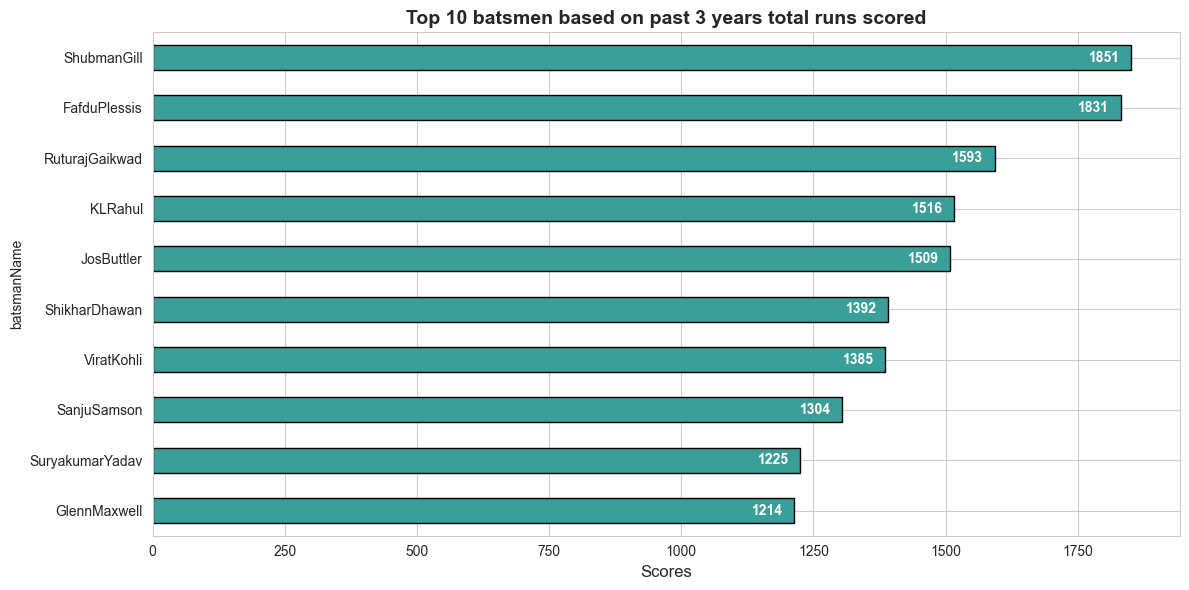

In [61]:
ax = top_runs.sort_values().plot(kind="barh", color="#3a9e99", edgecolor="black" )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years total runs scored", fontsize=14, weight='bold')
plt.xlabel("Scores", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(top_runs.sort_values()):
    ax.text(
        v-80 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='white',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 2. Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)


In [62]:
bating_avg

batsmanName
KLRahul            50.533333
FafduPlessis       43.595238
DavidMiller        43.200000
JosButtler         41.916667
ShimronHetmyer     40.666667
ShubmanGill        40.239130
ShikharDhawan      39.771429
RuturajGaikwad     37.928571
DavidWarner        37.900000
SuryakumarYadav    35.000000
dtype: float64

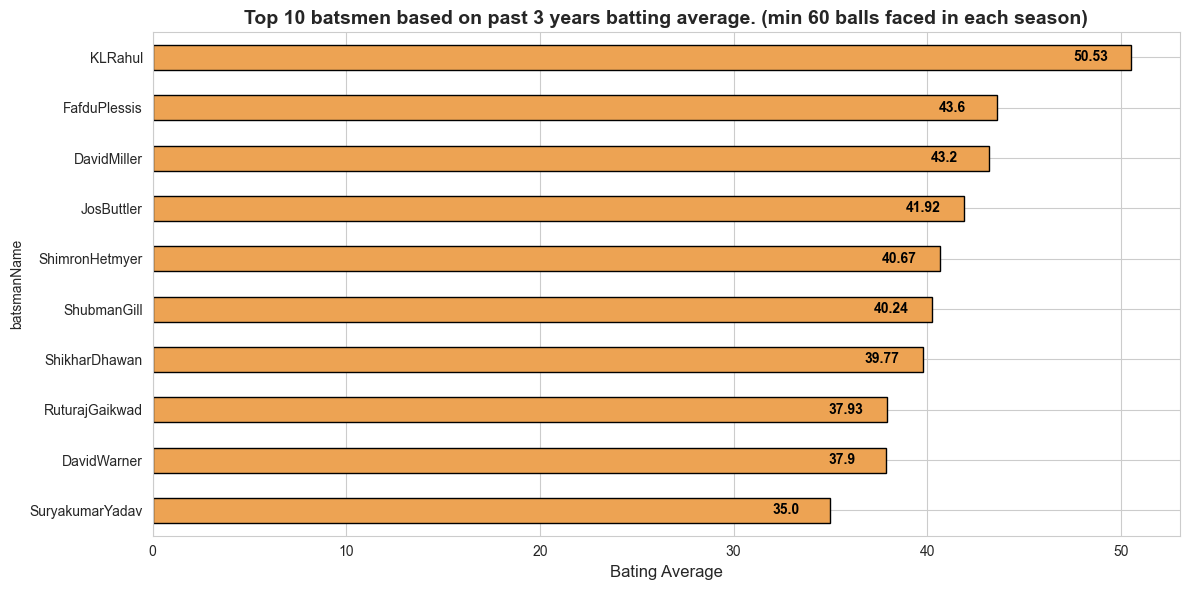

In [63]:
ax = bating_avg.sort_values().plot(kind="barh", color="#eda353", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)", fontsize=14, weight='bold')
plt.xlabel("Bating Average", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(bating_avg.sort_values().round(2)):
    ax.text(
        v - 3 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='black',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 3. Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

In [64]:
bating_striking_rate = avg_df.groupby("batsmanName").apply(lambda row: (row["runs"].sum() / row["balls"].sum()) * 100)
bating_striking_rate = bating_striking_rate.sort_values(ascending = False).head(10)
bating_striking_rate

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\3985522306.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bating_striking_rate = avg_df.groupby("batsmanName").apply(lambda row: (row["runs"].sum() / row["balls"].sum()) * 100)


batsmanName
GlennMaxwell       161.436170
SuryakumarYadav    160.550459
AndreRussell       159.188034
ShimronHetmyer     157.274401
NicholasPooran     157.112069
PrithviShaw        153.195489
DineshKarthik      152.643172
YashasviJaiswal    152.150538
JosButtler         146.932814
ShivamDube         145.950156
dtype: float64

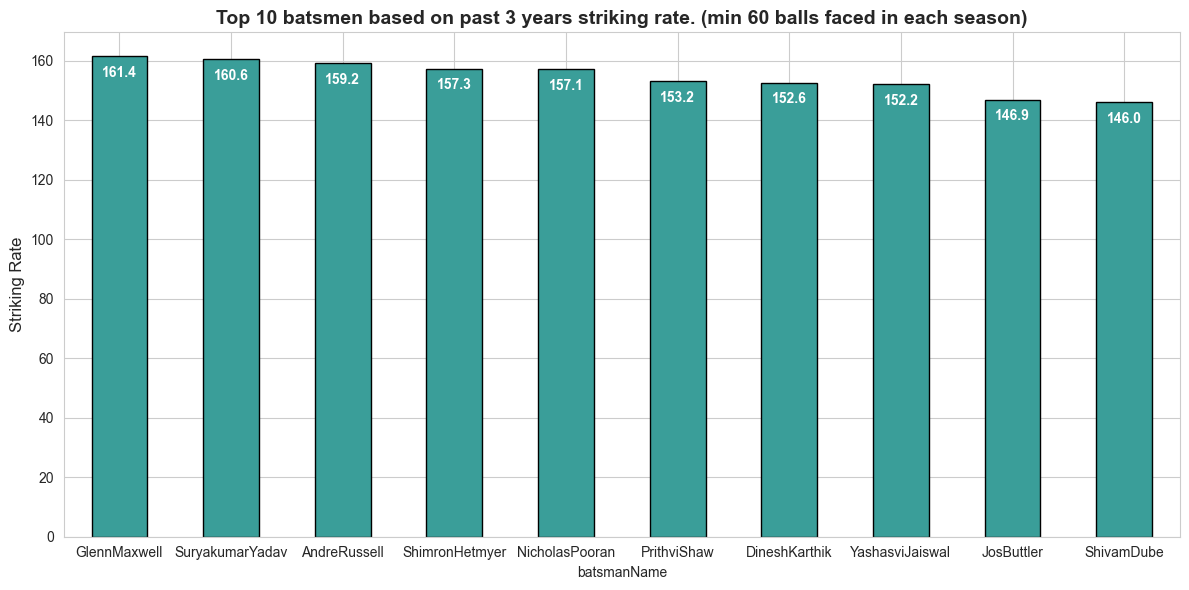

In [65]:
ax = bating_striking_rate.plot(kind="bar", color="#3a9e99", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 10 batsmen based on past 3 years striking rate. (min 60 balls faced in each season)", fontsize=14, weight='bold')
plt.ylabel("Striking Rate", fontsize=12)
plt.xticks(rotation = 0)
# plt.yticks(ticks= np.arange(0,161,10))

# Annotate scores on bars
for i, v in enumerate(bating_striking_rate.round(1)):
    ax.text(
        i,  # Small gap from bar end
        v-7,      # y position (index of bar)
        str(v),
        color='white',
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 4. Top 10 bowlers based on past 3 years total wickets taken.

In [66]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,18
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,24
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,24
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,24
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,24


In [67]:
df_bowler_wickets = df_fact_bowling.groupby("bowlerName")["wickets"].sum().sort_values(ascending = False).head(10)
df_bowler_wickets

bowlerName
MohammedShami        67
YuzvendraChahal      66
HarshalPatel         65
RashidKhan           63
AveshKhan            47
ArshdeepSingh        45
KagisoRabada         45
VarunChakravarthy    44
ShardulThakur        43
TrentBoult           42
Name: wickets, dtype: int64

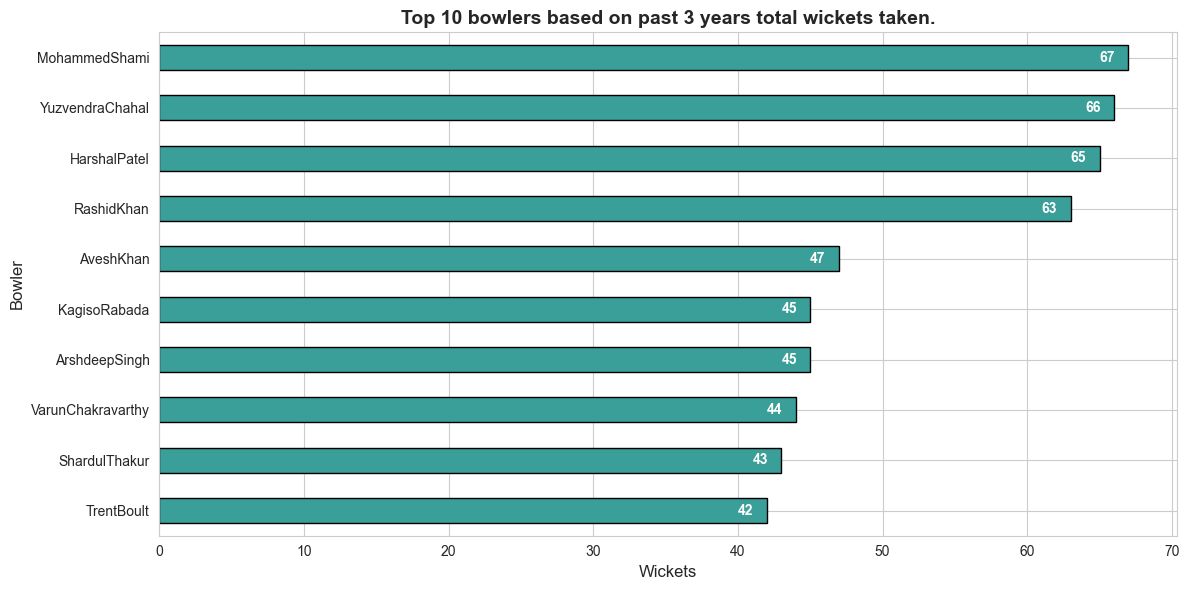

In [68]:
ax = df_bowler_wickets.sort_values().plot(kind="barh", color="#3a9e99", edgecolor="black" )

# Titles and labels
plt.title("Top 10 bowlers based on past 3 years total wickets taken.", fontsize=14, weight='bold')
plt.xlabel("Wickets", fontsize=12)
plt.ylabel("Bowler", fontsize=12)
# Annotate scores on bars
for i, v in enumerate(df_bowler_wickets.sort_values()):
    ax.text(
        v-2,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='white',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 5. Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

In [69]:
df_eligible_bowler.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,bowlingTeam,bowlerName,...,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,VarunChakravarthy,...,0,38,0,9.50,5,2,2,0,1,24
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,SunilNarine,...,0,26,2,6.50,6,0,1,1,0,24
8,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,ShardulThakur,...,0,38,3,9.50,11,3,1,4,1,24
10,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,RavindraJadeja,...,0,37,2,9.25,9,3,2,1,0,24
13,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1,Capitals Vs KKR,KKR,SunilNarine,...,0,27,0,6.75,9,0,2,1,0,24


In [70]:
df_bowling_avg = df_eligible_bowler.groupby("bowlerName")\
    .apply(lambda row: row["runs"].sum() / row["wickets"].sum()).round(1)\
    .sort_values().head(10)

df_bowling_avg

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\3155150504.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row["runs"].sum() / row["wickets"].sum()).round(1)\


bowlerName
AndreRussell       18.2
YuzvendraChahal    20.2
HarshalPatel       20.4
RashidKhan         20.9
MohammedShami      21.0
AveshKhan          23.7
KagisoRabada       23.8
MoeenAli           23.9
AnrichNortje       24.8
UmranMalik         26.1
dtype: float64

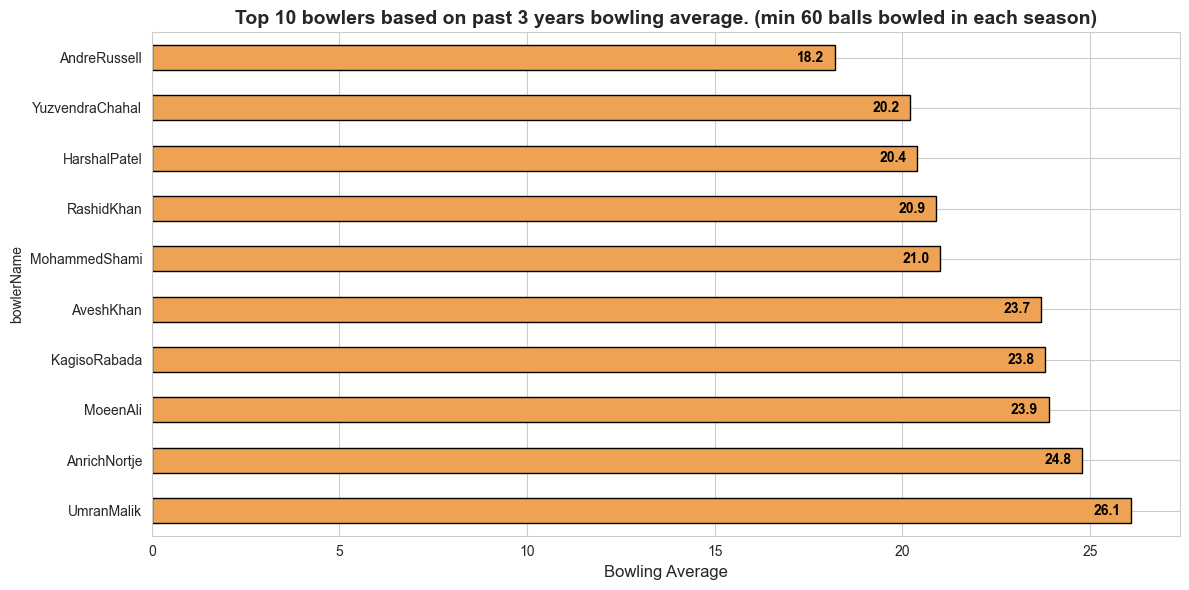

In [71]:
ax = df_bowling_avg.sort_values(ascending=False).plot(kind="barh", color="#eda353", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)", fontsize=14, weight='bold')
plt.xlabel("Bowling Average", fontsize=12)

# Annotate scores on bars
for i, v in enumerate(df_bowling_avg.sort_values(ascending=False)):
    ax.text(
        v-1 ,  # Small gap from bar end
        i,      # y position (index of bar)
        str(v),
        color='black',
        va='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 6. Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

In [72]:
df_economy_rate = df_eligible_bowler.groupby("bowlerName")\
    .apply(lambda row: row["runs"].sum() / row["overs"].sum()).round(2)\
    .sort_values().head(10)

df_economy_rate = df_economy_rate.reset_index(name="Economy")\
    .rename(columns={"bowlerName": "Bowler Name"})
df_economy_rate

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\762959708.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: row["runs"].sum() / row["overs"].sum()).round(2)\


,Bowler Name,Economy
0,SunilNarine,6.60
1,MoeenAli,7.09
2,AxarPatel,7.11
3,RashidKhan,7.22
4,KrunalPandya,7.45
5,RavindraJadeja,7.46
6,RavichandranAshwin,7.53
7,VarunChakravarthy,7.58
8,HarpreetBrar,7.61
9,RahulChahar,7.68


### 7. Top 5 batsmen based on past 3 years boundary % (fours and sixes).

In [73]:
avg_df.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,1


In [74]:
avg_df["boundary_scores"] = avg_df["4s"] * 4 + avg_df["6s"] * 6
avg_df.head()

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\129819308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_df["boundary_scores"] = avg_df["4s"] * 4 + avg_df["6s"] * 6


,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs,boundary_scores
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1,18
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1,46
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0,26
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1,24
5,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,2,VenkateshIyer,out,50,32,5,3,156.25,1,38


In [75]:
df_bd_pct = avg_df.groupby("batsmanName")\
.apply(lambda row: (row["boundary_scores"].sum() / row["runs"].sum()) * 100)\
.round(2)\
.sort_values(ascending = False).head(5)
df_bd_pct

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\2011094307.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: (row["boundary_scores"].sum() / row["runs"].sum()) * 100)\


batsmanName
AndreRussell       75.70
YashasviJaiswal    74.56
PrithviShaw        70.67
JosButtler         68.92
GlennMaxwell       68.70
dtype: float64

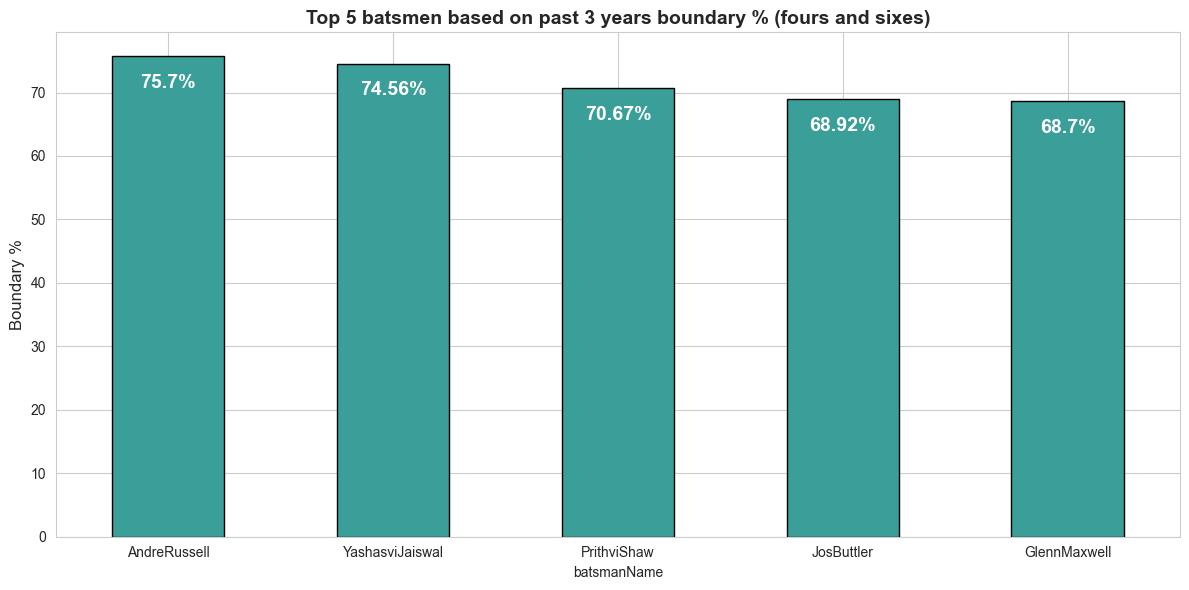

In [76]:
ax = df_bd_pct.plot(kind="bar", color="#3a9e99", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 5 batsmen based on past 3 years boundary % (fours and sixes)", fontsize=14, weight='bold')
plt.ylabel("Boundary %", fontsize=12)
plt.xticks(rotation = 0)
# plt.yticks(ticks= np.arange(0,161,10))

# Annotate scores on bars
for i, v in enumerate(df_bd_pct):
    ax.text(
        i,  # Small gap from bar end
        v-5,      # y position (index of bar)
        f"{str(v)}%",
        color='white',
        ha='center',
        fontsize=14,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 8. Top 5 bowlers based on past 3 years dot ball %.

In [77]:
df_eligible_bowler.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,bowlingTeam,bowlerName,...,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,VarunChakravarthy,...,0,38,0,9.50,5,2,2,0,1,24
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,SunilNarine,...,0,26,2,6.50,6,0,1,1,0,24
8,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,ShardulThakur,...,0,38,3,9.50,11,3,1,4,1,24
10,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,RavindraJadeja,...,0,37,2,9.25,9,3,2,1,0,24
13,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1,Capitals Vs KKR,KKR,SunilNarine,...,0,27,0,6.75,9,0,2,1,0,24


In [78]:
df_eligible_bowler.groupby("bowlerName")\
.apply(lambda row: (row["0s"].sum() / row["total_balls"].sum())*100)\
.sort_values(ascending=False).head(5)

C:\Users\memon\AppData\Local\Temp\ipykernel_14748\2405920033.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda row: (row["0s"].sum() / row["total_balls"].sum())*100)\


bowlerName
MohammedSiraj    47.712418
MohammedShami    47.574627
TrentBoult       46.365639
UmranMalik       44.147844
KhaleelAhmed     43.607706
dtype: float64

### 9. Top 4 teams based on past 3 years winning %.

In [79]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1


In [80]:
total_match = pd.concat([df_match_summary["team1"],df_match_summary["team2"]]).value_counts()
total_match

Super Kings     45
RCB             45
Royals          45
KKR             45
Mumbai          44
Capitals        43
Punjab Kings    42
Sunrisers       41
Titans          33
Super Giants    29
Name: count, dtype: int64

In [81]:
match_wins = df_match_summary.winner.value_counts()
match_wins

winner
Super Kings     25
RCB             25
Titans          23
Royals          22
KKR             21
Capitals        21
Mumbai          20
Punjab Kings    19
Super Giants    17
Sunrisers       13
Name: count, dtype: int64

In [82]:
winnig_pct = (match_wins / total_match) * 100
winnig_pct.round(2).sort_values(ascending = False)

Titans          69.70
Super Giants    58.62
RCB             55.56
Super Kings     55.56
Royals          48.89
Capitals        48.84
KKR             46.67
Mumbai          45.45
Punjab Kings    45.24
Sunrisers       31.71
Name: count, dtype: float64

In [83]:
total_match = total_match.reset_index(name="total_match")
total_match = total_match.rename(columns={"index":"team"})
total_match

,team,total_match
0,Super Kings,45
1,RCB,45
2,Royals,45
3,KKR,45
4,Mumbai,44
5,Capitals,43
6,Punjab Kings,42
7,Sunrisers,41
8,Titans,33
9,Super Giants,29


In [84]:
match_wins = match_wins.reset_index(name="match_wins")
match_wins = match_wins.rename(columns={"winner":"team"})
match_wins

,team,match_wins
0,Super Kings,25
1,RCB,25
2,Titans,23
3,Royals,22
4,KKR,21
5,Capitals,21
6,Mumbai,20
7,Punjab Kings,19
8,Super Giants,17
9,Sunrisers,13


In [85]:
df_match_merged = total_match.merge(match_wins, on="team")
df_match_merged

,team,total_match,match_wins
0,Super Kings,45,25
1,RCB,45,25
2,Royals,45,22
3,KKR,45,21
4,Mumbai,44,20
5,Capitals,43,21
6,Punjab Kings,42,19
7,Sunrisers,41,13
8,Titans,33,23
9,Super Giants,29,17


In [86]:
df_match_merged = df_match_merged.sort_values(by= "match_wins" ,ascending=False)
df_match_merged

,team,total_match,match_wins
0,Super Kings,45,25
1,RCB,45,25
8,Titans,33,23
2,Royals,45,22
5,Capitals,43,21
3,KKR,45,21
4,Mumbai,44,20
6,Punjab Kings,42,19
9,Super Giants,29,17
7,Sunrisers,41,13


In [87]:
df_match_merged["win_pct"] = ((df_match_merged.match_wins / df_match_merged.total_match) * 100).round(1)
df_match_merged

,team,total_match,match_wins,win_pct
0,Super Kings,45,25,55.6
1,RCB,45,25,55.6
8,Titans,33,23,69.7
2,Royals,45,22,48.9
5,Capitals,43,21,48.8
3,KKR,45,21,46.7
4,Mumbai,44,20,45.5
6,Punjab Kings,42,19,45.2
9,Super Giants,29,17,58.6
7,Sunrisers,41,13,31.7


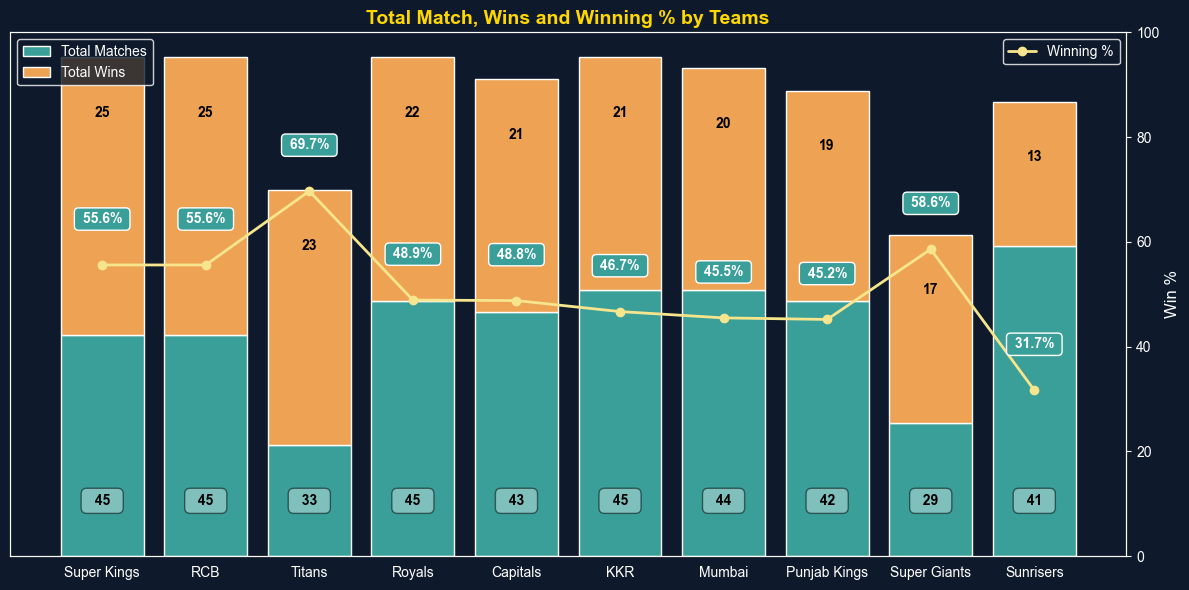

In [88]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
fig, ax1 = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor("#0E1A2B")
ax1.set_facecolor("#0E1A2B")

# Bars: bottom segment = total matches - wins
bars_bottom = ax1.bar(
    df_match_merged['team'],
    df_match_merged['total_match'] - df_match_merged['match_wins'],
    color="#3a9e99",
    label="Total Matches"
)

# Bars: top segment = wins
bars_top = ax1.bar(
    df_match_merged['team'],
    df_match_merged['match_wins'],
    bottom=df_match_merged['total_match'] - df_match_merged['match_wins'],
    color="#eda353",
    label="Total Wins"
)

# Labels inside bottom segment
for i, val in enumerate(df_match_merged['total_match']):
    ax1.text(i, 5, f"  {str(df_match_merged['total_match'].iloc[i])}  ",
             ha='center', va='center', fontsize=10, fontweight='bold', color="black"
             ,bbox=dict(facecolor='#c5e3e2', alpha=0.5, boxstyle='round,pad=0.4', edgecolor="black"))

# Labels inside top segment
for i, val in enumerate(df_match_merged['match_wins']):
    ax1.text(i,
             df_match_merged['total_match'].iloc[i] - 5,
             str(val),
             ha='center', va='center', fontsize=10, fontweight='bold', color="black")

# Line chart for win %
ax2 = ax1.twinx()
ax2.plot(
    df_match_merged['team'],
    df_match_merged['win_pct'],
    color="#f6e58d",
    marker='o',
    linewidth=2,
    label="Winning %"
)

# Labels on line points
for i, v in enumerate(df_match_merged['win_pct']):
    ax2.text(i, v+8, f" {v}% ", ha='center', fontsize=10, color="white", fontweight='bold',
             bbox=dict(facecolor='#3a9e99', alpha=1, boxstyle='round,pad=0.3', edgecolor="white"))

# Titles & labels
ax1.set_title("Total Match, Wins and Winning % by Teams",
              fontsize=14, fontweight='bold', color="gold")
# ax1.set_ylabel("Matches", fontsize=12, color="white")
ax1.set_yticks(np.arange(0,0))
ax2.set_ylabel("Win %", fontsize=12, color="white")
ax2.set_yticks(np.arange(0, 101, 20))
ax2.set_ylim(0, 100)

ax1.set_xticks(range(len(df_match_merged['team'])))
ax1.set_xticklabels(df_match_merged['team'], fontsize=10, color="white")

# Grid styling
# ax1.grid(axis="y", linestyle="--", alpha=0.3, color="white")
ax1.grid(False)
ax2.grid(False)  # Remove second grid

# Legends
ax1.legend(loc="upper left", facecolor="#0E1A2B", edgecolor="white", fontsize=10)
ax2.legend(loc="upper right", facecolor="#0E1A2B", edgecolor="white", fontsize=10)

plt.tight_layout()
plt.show()


### 10. Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.

In [89]:
win_chase = df_match_summary[df_match_summary["margin"].str.contains("wickets", case=False, na=False)]
win_chase.head()

,team1,team2,winner,margin,matchDate,match_id,season
1,Capitals,KKR,KKR,3 wickets,2021-10-13,T206442,Season 1
2,RCB,KKR,KKR,4 wickets,2021-10-11,T208597,Season 1
3,Capitals,Super Kings,Super Kings,4 wickets,2021-10-10,T201819,Season 1
4,Capitals,RCB,RCB,7 wickets,2021-10-08,T205942,Season 1
7,Super Kings,Punjab Kings,Punjab Kings,6 wickets,2021-10-07,T201866,Season 1


In [90]:
top_2_by_chase = win_chase.winner.value_counts().sort_values(ascending=False).head(2)
top_2_by_chase

winner
KKR         14
Capitals    14
Name: count, dtype: int64

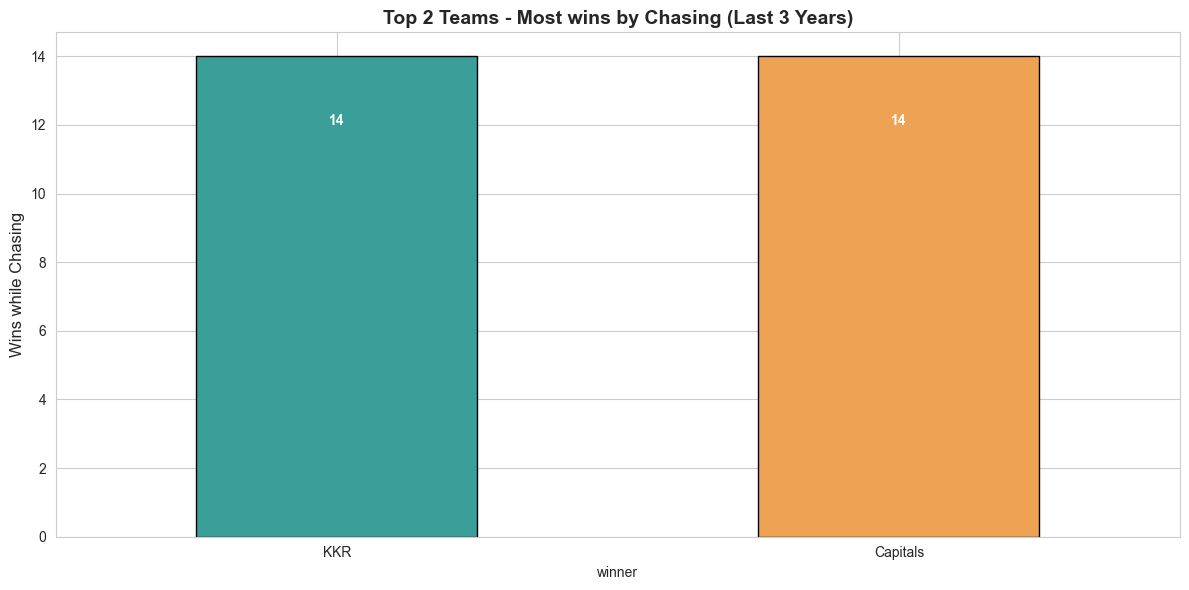

In [91]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

ax = top_2_by_chase.plot(kind="bar", color=["#3a9e99","#eda353"], edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 2 Teams - Most wins by Chasing (Last 3 Years)", fontsize=14, weight='bold')
plt.ylabel("Wins while Chasing", fontsize=12)
plt.xticks(rotation = 0)

# Annotate scores on bars
for i, v in enumerate(top_2_by_chase):
    ax.text(
        i,  # Small gap from bar end
        v-2,      # y position (index of bar)
        str(v),
        color='white',
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

<h2 style="color:red">Secondary Analysis</h2>

**Note: Predict the following for the season 2024 using available data and by doing additional
research**

### 1. Orange and purple cap player

**Orange Cap: Most Runs Scored**

In [92]:
df_bating_season_merged.shape

(3268, 18)

In [93]:
df_bating_season_merged.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [94]:
df_season_data = df_bating_season_merged.groupby(["season","batsmanName"] )["runs"].sum().sort_values(ascending=False).reset_index()
df_season_data.head()

,season,batsmanName,runs
0,Season 3,ShubmanGill,890
1,Season 2,JosButtler,863
2,Season 3,FafduPlessis,730
3,Season 3,DevonConway,672
4,Season 3,ViratKohli,639


In [95]:
or_s3 = df_season_data[df_season_data["season"].str.contains("Season 3", case=False)].sort_values("runs", ascending = False).head(5)

In [96]:
or_s2 = df_season_data[df_season_data["season"].str.contains("Season 2", case=False)].sort_values("runs", ascending = False).head(5)

In [97]:
or_s1 = df_season_data[df_season_data["season"].str.contains("Season 1", case=False)].sort_values("runs", ascending = False).head(5)

In [98]:
orange_cap_all_season = pd.concat([or_s3,or_s2,or_s1])
orange_cap_prediction =  orange_cap_all_season.sort_values("runs", ascending = False).head()
orange_cap_prediction[["batsmanName","runs"]]

,batsmanName,runs
0,ShubmanGill,890
1,JosButtler,863
2,FafduPlessis,730
3,DevonConway,672
4,ViratKohli,639


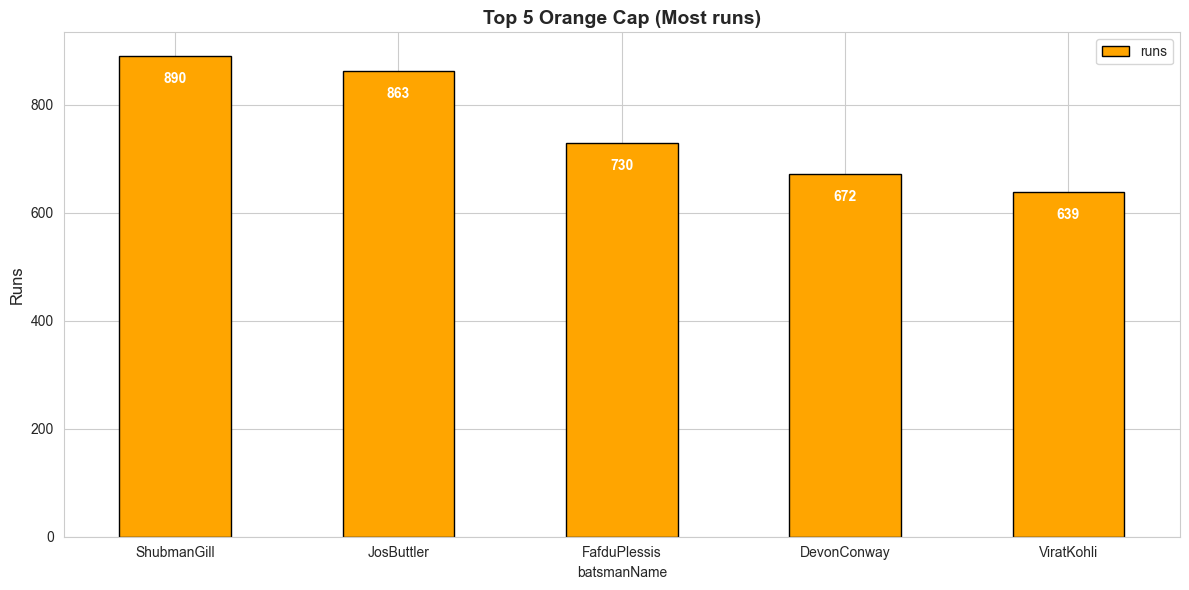

In [99]:
ax = orange_cap_prediction.set_index("batsmanName").plot(kind="bar", color="orange", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 5 Orange Cap (Most runs)", fontsize=14, weight='bold')
plt.ylabel("Runs", fontsize=12)
plt.xticks(rotation = 0)

# Annotate scores on bars
for i, v in enumerate(orange_cap_prediction["runs"]):
    ax.text(
        i,  # Small gap from bar end
        v-50,      # y position (index of bar)
        str(v),
        color='white',
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

In [100]:
df_bowling_season_merged.head()

,team1,team2,winner,margin,matchDate,match_id,season,match,bowlingTeam,bowlerName,...,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
0,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,ShakibAlHasan,...,0,33,0,11.0,6,2,3,0,0,18
1,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,ShivamMavi,...,0,32,1,8.0,8,1,2,0,0,24
2,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,LockieFerguson,...,0,56,0,14.0,4,7,2,2,0,24
3,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,VarunChakravarthy,...,0,38,0,9.5,5,2,2,0,1,24
4,Super Kings,KKR,Super Kings,27 runs,2021-10-15,T203817,Season 1,Super Kings Vs KKR,KKR,SunilNarine,...,0,26,2,6.5,6,0,1,1,0,24


In [101]:
df_season_data_bowling = df_bowling_season_merged.groupby(["season","bowlerName"] )["wickets"].sum().sort_values(ascending=False).reset_index()
df_season_data_bowling.head(10)

,season,bowlerName,wickets
0,Season 1,HarshalPatel,32
1,Season 3,MohammedShami,28
2,Season 3,MohitSharma,27
3,Season 3,RashidKhan,27
4,Season 2,YuzvendraChahal,27
5,Season 2,WaninduHasaranga,26
6,Season 2,KagisoRabada,23
7,Season 3,PiyushChawla,22
8,Season 2,UmranMalik,22
9,Season 3,YuzvendraChahal,21


In [102]:
pp_s3 = df_season_data_bowling[df_season_data_bowling["season"].str.contains("Season 3", case=False)].sort_values("wickets", ascending = False).head(5)

In [103]:
pp_s2 = df_season_data_bowling[df_season_data_bowling["season"].str.contains("Season 2", case=False)].sort_values("wickets", ascending = False).head(5)

In [104]:
pp_s1 = df_season_data_bowling[df_season_data_bowling["season"].str.contains("Season 1", case=False)].sort_values("wickets", ascending = False).head(5)

In [105]:
purple_cap_all_season = pd.concat([pp_s3,pp_s2,pp_s1])
purple_cap_prediction =  purple_cap_all_season.sort_values("wickets", ascending = False).head()
purple_cap_prediction[["bowlerName","wickets"]]

,bowlerName,wickets
0,HarshalPatel,32
1,MohammedShami,28
2,MohitSharma,27
4,YuzvendraChahal,27
3,RashidKhan,27


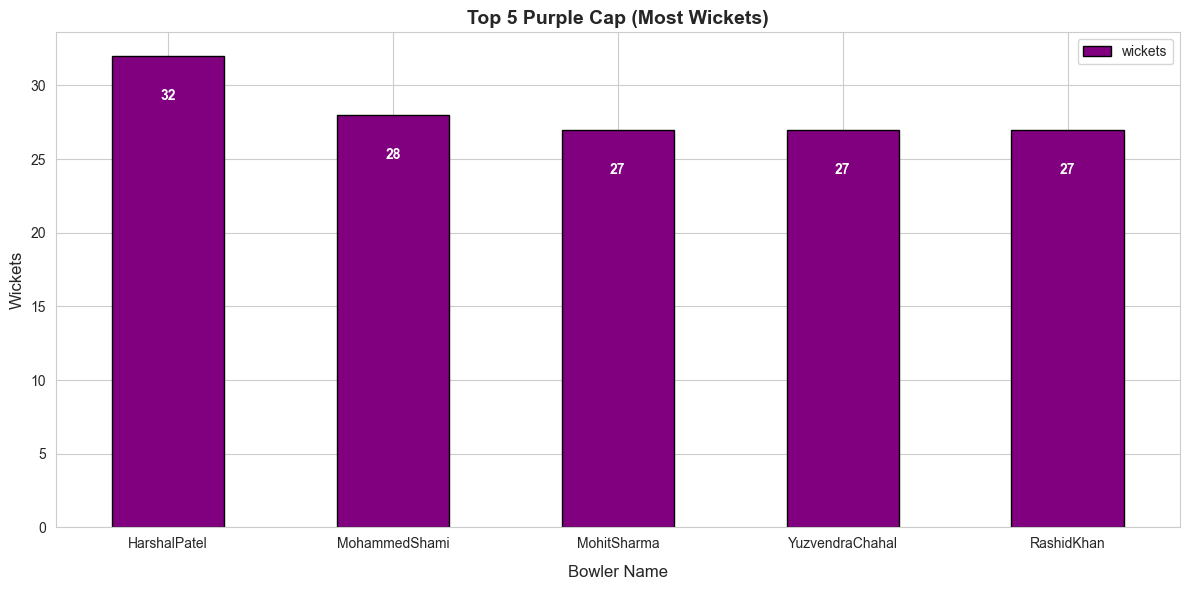

In [106]:
ax = purple_cap_prediction.set_index("bowlerName").plot(kind="bar", color="purple", edgecolor="black", alpha=1 )

# Titles and labels
plt.title("Top 5 Purple Cap (Most Wickets)", fontsize=14, weight='bold')
plt.ylabel("Wickets", fontsize=12)
plt.xlabel("Bowler Name", fontsize=12, labelpad = 10)
plt.xticks(rotation = 0)

# Annotate scores on bars
for i, v in enumerate(purple_cap_prediction["wickets"]):
    ax.text(
        i,  # Small gap from bar end
        v-3,      # y position (index of bar)
        str(v),
        color='white',
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.tight_layout()
plt.show()

### 2. Top 4 qualifying teams

**Prediction based on winning percentage of teams**

In [107]:
winnig_pct.sort_values(ascending = False).head(4).round(1)

Titans          69.7
Super Giants    58.6
RCB             55.6
Super Kings     55.6
Name: count, dtype: float64

In [108]:
print(f"Top 4 qualifying teams are: {list(winnig_pct.sort_values(ascending = False).head(4).round(1).index)}")

Top 4 qualifying teams are: ['Titans', 'Super Giants', 'RCB', 'Super Kings']


### 3. Winner and runner-up

**Most wins by chasing**

In [109]:
top_2_by_chase

winner
KKR         14
Capitals    14
Name: count, dtype: int64

### 5. Pick your top 3 all-rounders

**Assuming: Players with atleast**
- 200+ runs and
- 10+ wickets (across 3 years)

In [110]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [111]:
bat_sum = df_fact_bating.groupby("batsmanName")["runs"].sum().reset_index()
bat_sum.head()

,batsmanName,runs
0,ABdeVilliers,313
1,AaronFinch,86
2,AbdulBasith,1
3,AbdulSamad,284
4,AbhijeetTomar,4


In [112]:
df_fact_bowling.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,total_balls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,18
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,24
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,24
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,24
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,24


In [113]:
ball_sum = df_fact_bowling.groupby("bowlerName")["wickets"].sum().reset_index()
ball_sum.head()

,bowlerName,wickets
0,AbdulSamad,1
1,AbhishekSharma,6
2,AdamMilne,3
3,AdamZampa,8
4,AdilRashid,2


In [114]:
all_rounder = pd.merge(bat_sum, ball_sum, left_on="batsmanName", right_on="bowlerName")

all_rounder.shape

(174, 4)

In [115]:
all_rounder.head()

,batsmanName,runs,bowlerName,wickets
0,AbdulSamad,284,AbdulSamad,1
1,AbhishekSharma,745,AbhishekSharma,6
2,AdamMilne,16,AdamMilne,3
3,AdamZampa,10,AdamZampa,8
4,AdilRashid,22,AdilRashid,2


In [116]:
all_rounder = all_rounder[(all_rounder.runs >= 200) & (all_rounder.wickets >= 10)]
all_rounder.shape

(15, 4)

In [117]:
all_rounder

,batsmanName,runs,bowlerName,wickets
11,AndreRussell,745,AndreRussell,35
18,AxarPatel,505,AxarPatel,30
43,GlennMaxwell,1214,GlennMaxwell,12
46,HardikPandya,960,HardikPandya,11
71,KrunalPandya,514,KrunalPandya,24
78,LalitYadav,295,LalitYadav,10
84,MarcusStoinis,645,MarcusStoinis,11
89,MitchellMarsh,379,MitchellMarsh,16
91,MoeenAli,725,MoeenAli,21
120,RashidKhan,304,RashidKhan,63


In [118]:
top_3_all_rounder =  all_rounder.sort_values(by=["runs", "wickets"], ascending=False).head(3)

In [119]:
print("My Top 3 All Rounder are: ")
print(top_3_all_rounder[["batsmanName","runs","wickets"]])

My Top 3 All Rounder are: 
     batsmanName  runs  wickets
43  GlennMaxwell  1214       12
46  HardikPandya   960       11
11  AndreRussell   745       35


### 4. Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research

#### My team logic:
1. **Four Batsmen: Highest Total Runs**
2. **One Wicket Keeper: Among top runs scorers with role as "wk", "keeper" except top 4**
3. **Three Bowlers: Highest Wickets Taker**
4. **Three All Rounders: Players with 200+ Runs and 10+ wickets**

In [120]:
df_fact_bating.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1


In [121]:
df_players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [122]:
df_fact_player_role =  df_fact_bating.merge(df_players, left_on="batsmanName", right_on="name")

In [123]:
df_fact_player_role.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,outs,name,team,battingStyle,bowlingStyle,playingRole
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,1,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,1,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,0,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,1,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [124]:
top_4_batsman =  df_fact_player_role.groupby("batsmanName")["runs"].sum().sort_values(ascending = False).head(4)

In [125]:
top_4_batsman

batsmanName
ShubmanGill       1851
FafduPlessis      1831
RuturajGaikwad    1593
KLRahul           1516
Name: runs, dtype: int64

In [126]:
df_fact_player_role.playingRole.unique()

array(['Batter', 'Middle order Batter', 'Batting Allrounder',
       'Opening Batter', 'Allrounder', 'Bowling Allrounder',
       'Wicketkeeper Batter', 'Top order Batter', 'Bowler'], dtype=object)

In [127]:
df_wk_player =  df_fact_player_role[df_fact_player_role["playingRole"].str.contains("wicket", case=False)]

In [128]:
top_wk_player = df_wk_player.groupby("batsmanName")["runs"].sum().sort_values(ascending = False).reset_index()

In [129]:
wicket_keeper = top_wk_player[~top_wk_player.batsmanName.isin(top_4_batsman.index)].head(1).set_index("batsmanName")
wicket_keeper

,runs
batsmanName,
JosButtler,1509


In [130]:
top_3_all_rounder = top_3_all_rounder.set_index("batsmanName")

In [131]:
top_3_bowlers = df_fact_bowling.groupby("bowlerName")["wickets"].sum().sort_values(ascending = False).head(3)

In [132]:
top_3_bowlers

bowlerName
MohammedShami      67
YuzvendraChahal    66
HarshalPatel       65
Name: wickets, dtype: int64

In [133]:
list([list(top_4_batsman.index), list(wicket_keeper.index), list(top_3_all_rounder.index), list(top_3_bowlers.index)])

[['ShubmanGill', 'FafduPlessis', 'RuturajGaikwad', 'KLRahul'],
 ['JosButtler'],
 ['GlennMaxwell', 'HardikPandya', 'AndreRussell'],
 ['MohammedShami', 'YuzvendraChahal', 'HarshalPatel']]

In [134]:
my_11_players = list()

In [135]:
my_11_players.extend(list(top_4_batsman.index))

In [136]:
my_11_players

['ShubmanGill', 'FafduPlessis', 'RuturajGaikwad', 'KLRahul']

In [137]:
my_11_players.extend(list(wicket_keeper.index))

In [138]:
my_11_players

['ShubmanGill', 'FafduPlessis', 'RuturajGaikwad', 'KLRahul', 'JosButtler']

In [139]:
my_11_players.extend(list(top_3_bowlers.index))

In [140]:
my_11_players.extend(list(top_3_all_rounder.index))

In [141]:
my_11_players

['ShubmanGill',
 'FafduPlessis',
 'RuturajGaikwad',
 'KLRahul',
 'JosButtler',
 'MohammedShami',
 'YuzvendraChahal',
 'HarshalPatel',
 'GlennMaxwell',
 'HardikPandya',
 'AndreRussell']

In [142]:
print("My Playing 11 are:")
for i, players in enumerate(my_11_players):
    
    print(f"{i+1}.  {players}")

My Playing 11 are:
1.  ShubmanGill
2.  FafduPlessis
3.  RuturajGaikwad
4.  KLRahul
5.  JosButtler
6.  MohammedShami
7.  YuzvendraChahal
8.  HarshalPatel
9.  GlennMaxwell
10.  HardikPandya
11.  AndreRussell
